File name: DBSCAN_vector_clustering

Description: this file contains the code for DBSCAN clustering using the vectorised descriptions of the recipes.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from statistics import mean
import json

In [4]:
df = pd.read_csv('../../data/description_embeddings.csv')
tf_idf = [json.loads(x) for x in df["tf-idf"].tolist()]
bow = [json.loads(x) for x in df["bow"].tolist()]
mean_vector = [json.loads(x) for x in df["mean_vector"].tolist()]

embeddings = [tf_idf, bow, mean_vector]
embeddings_names = ["tf-idf", "bow", "mean_vector"]

In [17]:
EPS = np.arange(0.1, 1.5, 0.1)
scores = {}

for index_embed, embedding in enumerate(embeddings):
    silhouette_scores = []
    davies_bouldin_scores = []
    for eps in EPS:
        #print(index," ----  ",k)
        dbscan = DBSCAN(eps=eps).fit(embedding)
        #inertia.append(kmeans.inertia_)
        #print(kmeans.inertia_)
        score = silhouette_score(embedding, dbscan.labels_)
        silhouette_scores.append(score)
        davies_score = davies_bouldin_score(embedding, dbscan.labels_)
        davies_bouldin_scores.append(davies_score)
            
    scores[embeddings_names[index_embed]] = {
        "silhouette_scores": silhouette_scores
        ,"davies_bouldin_scores": davies_bouldin_scores
    } 
    
with open('../../data/json/embeddings/dbscan.json', 'w') as f:
    json.dump(scores, f) 

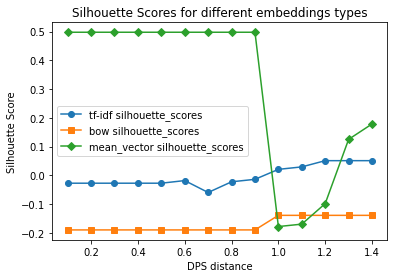

In [ ]:


markers = ['o', 's', 'D']

for index, values in enumerate(scores):
    plt.plot(EPS, scores[values]["silhouette_scores"], label=f"{values} silhouette_scores", marker=markers[index])
    
plt.legend()
plt.xlabel("DPS distance")
plt.ylabel("Silhouette Score")              
plt.title("Silhouette Scores for different embeddings types")
plt.show()

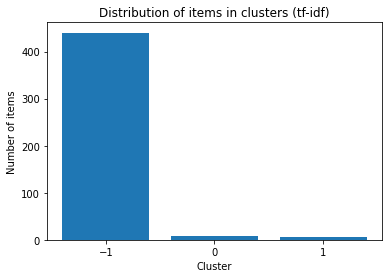

In [16]:
dbscan = DBSCAN(eps=0.1).fit(tf_idf)
labels = dbscan.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1])
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters (tf-idf)")
plt.show()

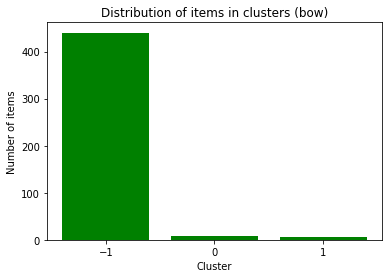

In [15]:
dbscan = DBSCAN(eps=0.1).fit(bow)
labels = dbscan.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1], color='green')
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters (bow)")
plt.show()

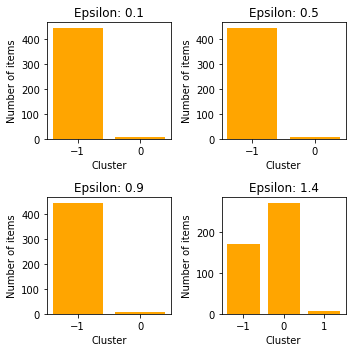

In [14]:
fig, ax = plt.subplots(2,2,figsize=(5, 5))

eps_list = [0.1, 0.5, 0.9, 1.4]

for i in range(2):
    for j in range(2):      
        eps = eps_list.pop(0)
        dbscan = DBSCAN(eps=eps).fit(mean_vector)
        labels = dbscan.labels_
        category_dist = np.unique(labels, return_counts=True)
        ax[i][j].bar(category_dist[0], category_dist[1], color='orange')
        ax[i][j].set_xlabel("Cluster")
        ax[i][j].set_xticks(category_dist[0])
        ax[i][j].set_ylabel("Number of items")
        ax[i][j].set_title(f"Epsilon: {eps}")

plt.tight_layout()
plt.show()